
# Final Project

This is the final project of Kiara Martin for the Peckham Digital Accelerator Zone: Introduction to Data Science course. 

I will be comparing UK weather sunshine and rainfall data from https://www.metoffice.gov.uk/research/climate/maps-and-data/uk-and-regional-series and comparing it against UK diagnosed sexually transmitted infection from https://www.gov.uk/government/statistics/sexually-transmitted-infections-stis-annual-data-tables to identify a possible correlation. If identified this data would be useful to UK public health authourites in combating the increase sexually transmitted infections. This could allow for targetted public health promotions and more effective advertising opportunites for companies selling contraceptive in line with weather preditions.

Initial hypothesis : When the rainfall volume decreases and the hours of sunshine increase so will the diagnositic rate of STIs increase due to more socialisation between sexual partners.

I will now be narrowing my research of all STIs of all ages to focus of sexually transmitted infections to Chlamydia diagnoses by gender identity and age group in people aged 15 to 24 years in England between 2015 to 2024. This is due to narrowing my dataset and that Chlamydia diagnoses are the most commonly diagnosed STI (reference needed). 

I will also be the UK to just England so to match the chlamydia diagnoses by gender identity and age group in people aged 15 to 24 years in England between 2015 to 2024 dataset with the same region covered by the weather sunshine and rainfall data dataset. There is the possiblity to narrow futher via regions however, it is not clear what the exact geographical boundaries of regions are for both data sets for example the boundaries of Midlands and East of England could vary.

Factors that could interfer with the chlamydia diagnoses data include the Covid-19 pandemic ranging from the years 2020 to 2021. The data sourced states that there 'is notably lower than previous years due to the reconfiguration of sexual health services during the national response to the COVID-19 pandemic.'
Other factors that alter chlamydia diagnostic rate include (refernece needed)

It is noted that the 'Data presented in relation to gender identity may, or may not, be the same as sex registered at birth. The data total may include people who are gender diverse or those reported with an unknown gender. Therefore the sum of data for men and women may not equal the data total'. To combat this I will use only the data in the 'Total' rows of the Gender column not the data in the rows labled 'Male' and 'Female'. 

 


In [4]:
# installs
# !pip install pandas matplotlib


## Imports

Importing libraries and data files.
Double checking the pathwaty of the data files.

In [5]:
import pandas as pd # Data manipulation library
import matplotlib.pyplot as plt # Plotting library

In [6]:
sunshine_data_path = 'Raw_data/Sunshine_England.csv' # Path to the sunshine data CSV file
sunshine_df = pd.read_csv(sunshine_data_path) # Load the sunshine data into a DataFrame
sunshine_df # Display the first few rows of the sunshine data

,year,ann
0,1910,1373.5
1,1911,1662.3
2,1912,1202.6
3,1913,1254.5
4,1914,1522.3
...,...,...
111,2021,1486.9
112,2022,1741.4
113,2023,1559.3
114,2024,1394.6


In [7]:
rainfall_data_path = 'Raw_data/Rainfall_England.csv' # Path to the rainfall data CSV file
rainfall_df = pd.read_csv(rainfall_data_path) # Load the rainfall data into a DataFrame
rainfall_df # Display the first few rows of the rainfall data


,year,ann
0,1836,885.2
1,1837,746.5
2,1838,757.1
3,1839,918.1
4,1840,688.7
...,...,...
185,2021,877.3
186,2022,778.8
187,2023,1066.2
188,2024,1020.1


In [8]:
chlamydia_data_path = 'Raw_data/Chlamydia.csv' # Path to the chlamydia data CSV file
chlamydia_df = pd.read_csv(chlamydia_data_path, thousands=',') # Load the chlamydia data into a DataFrame
chlamydia_df # Display the first few rows of the chlamydia data

,Area of residence,Tests or diagnoses,Gender identity\n[note 5],Age,2015,2016,2017,2018,2019,2020 \n[note 10],2021\n[note 10],2022,2023,2024,Percentage change\n2023 to 2024,Unnamed: 15,Unnamed: 16
0,England,Tests,Women,15 to 19,415359.0,365619.0,328458.0,312368.0,311493.0,"198,308","192,416",194795.0,193903.0,170331.0,-12.2,NaN,NaN
1,England,Tests,Women,20 to 24,669788.0,632606.0,599518.0,613386.0,633243.0,"478,495","500,036",495316.0,479199.0,430964.0,-10.1,NaN,NaN
2,England,Tests,Men,15 to 19,147030.0,123265.0,107790.0,103493.0,103960.0,"60,001","56,300",61138.0,61559.0,54074.0,-12.2,NaN,NaN
3,England,Tests,Men,20 to 24,299623.0,280108.0,263885.0,273243.0,279066.0,"195,062","199,774",215446.0,213612.0,190062.0,-11.0,NaN,NaN
4,England,Tests,Total,15 to 19,569147.0,497193.0,442535.0,421986.0,422474.0,"262,430","255,650",267251.0,265638.0,233780.0,-12.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# check the pathway 
import os
print(os.getcwd())

/Users/kiaramartin/Documents/GitHub/Final_Project



## Reading and Indentifying data types


In [10]:
sunshine_df.info() # Display information about the Sunshine DataFrame, including data types and non-null counts
sunshine_df.describe() # Display summary statistics for numerical columns in the Sunshine DataFrame
sunshine_df.head() # Display the first few rows of the Sunshine DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    116 non-null    int64 
 1      ann  116 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


,year,ann
0,1910,1373.5
1,1911,1662.3
2,1912,1202.6
3,1913,1254.5
4,1914,1522.3


In [11]:
rainfall_df.info() # Display information about the DataFrame, including data types and non-null counts  
rainfall_df.describe() # Display summary statistics for numerical columns in the DataFrame
rainfall_df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    190 non-null    int64 
 1      ann  190 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


,year,ann
0,1836,885.2
1,1837,746.5
2,1838,757.1
3,1839,918.1
4,1840,688.7


In [12]:
chlamydia_df.info() # Display information about the DataFrame, including data types and non-null counts
chlamydia_df.describe() # Display summary statistics for numerical columns in the DataFrame
chlamydia_df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Area of residence               130 non-null    object 
 1   Tests or diagnoses              130 non-null    object 
 2   Gender identity
[note 5]        130 non-null    object 
 3   Age                             130 non-null    object 
 4   2015                            130 non-null    float64
 5   2016                            130 non-null    float64
 6   2017                            130 non-null    float64
 7   2018                            130 non-null    float64
 8   2019                            130 non-null    float64
 9   2020 
[note 10]                 130 non-null    object 
 10  2021
[note 10]                  130 non-null    object 
 11  2022                            130 non-null    float64
 12  2023                            130 

,Area of residence,Tests or diagnoses,Gender identity\n[note 5],Age,2015,2016,2017,2018,2019,2020 \n[note 10],2021\n[note 10],2022,2023,2024,Percentage change\n2023 to 2024,Unnamed: 15,Unnamed: 16
0,England,Tests,Women,15 to 19,415359.0,365619.0,328458.0,312368.0,311493.0,"198,308","192,416",194795.0,193903.0,170331.0,-12.2,NaN,NaN
1,England,Tests,Women,20 to 24,669788.0,632606.0,599518.0,613386.0,633243.0,"478,495","500,036",495316.0,479199.0,430964.0,-10.1,NaN,NaN
2,England,Tests,Men,15 to 19,147030.0,123265.0,107790.0,103493.0,103960.0,"60,001","56,300",61138.0,61559.0,54074.0,-12.2,NaN,NaN
3,England,Tests,Men,20 to 24,299623.0,280108.0,263885.0,273243.0,279066.0,"195,062","199,774",215446.0,213612.0,190062.0,-11.0,NaN,NaN
4,England,Tests,Total,15 to 19,569147.0,497193.0,442535.0,421986.0,422474.0,"262,430","255,650",267251.0,265638.0,233780.0,-12.0,NaN,NaN



## Data Cleaning of Sunshine Data

I will identify and rename the headings for clarity. Then I will convert the columns to be the correct type. I will ensure the 'Year' column is displayed correctly. I will drop rows with missing values followed by rows outside the required timeframe of 2015 - 2024. 


In [13]:
print(sunshine_df.columns)

Index(['year  ', '   ann'], dtype='object')


In [14]:
sunshine_df.rename(columns={'year  ': 'Year', '   ann': 'Annual Sunshine Hours'}, inplace=True) # Rename columns for clarity
sunshine_df.head()  # Display the first few rows of the updated Sunshine DataFrame

,Year,Annual Sunshine Hours
0,1910,1373.5
1,1911,1662.3
2,1912,1202.6
3,1913,1254.5
4,1914,1522.3


In [15]:
sunshine_df['Year'] = pd.to_datetime(sunshine_df['Year'], format='%Y') # Convert 'Year' column to datetime format
sunshine_df['Annual Sunshine Hours'].astype, (float) # Ensure 'Annual Sunshine Hours' is of type float
sunshine_df.info() # Display summary statistics for numerical columns in the updated Sunshine DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Year                   116 non-null    datetime64[ns]
 1   Annual Sunshine Hours  116 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.9+ KB


In [16]:
sunshine_df.dropna(inplace=True) # Drop rows with missing values in the Sunshine DataFrame

# Keep only rows where the year is between 1910 and 2014 (inclusive)
sunshine_df = sunshine_df[(sunshine_df['Year'].dt.year >= 2015) & (sunshine_df['Year'].dt.year <= 2024)] # Filter the Sunshine DataFrame for the specified year range
sunshine_df

,Year,Annual Sunshine Hours
105,2015-01-01,1579.8
106,2016-01-01,1551.1
107,2017-01-01,1508.7
108,2018-01-01,1691.9
109,2019-01-01,1615.5
110,2020-01-01,1676.5
111,2021-01-01,1486.9
112,2022-01-01,1741.4
113,2023-01-01,1559.3
114,2024-01-01,1394.6


In [17]:
# Need to convert the 'Year' column to display the year only

sunshine_df['Year'] = sunshine_df['Year'].dt.year # Convert 'Year' column to display only the year


/var/folders/zh/7q9zzj496zl6c_xx_q5_21lm0000gn/T/ipykernel_9581/2364789749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunshine_df['Year'] = sunshine_df['Year'].dt.year # Convert 'Year' column to display only the year


In [18]:
sunshine_df # Display the first few rows of the final Sunshine DataFrame after cleaning and formatting

,Year,Annual Sunshine Hours
105,2015,1579.8
106,2016,1551.1
107,2017,1508.7
108,2018,1691.9
109,2019,1615.5
110,2020,1676.5
111,2021,1486.9
112,2022,1741.4
113,2023,1559.3
114,2024,1394.6



### Reading and Indentifying Sunshine Data Type to confirm cleaning is complete


In [19]:
sunshine_df.info() # Display information about the final Sunshine DataFrame, including data types and non-null counts
sunshine_df.describe() # Display summary statistics for numerical columns in the final Sunshine DataFrame
sunshine_df.head() # Display the first few rows of the final Sunshine DataFrame after cleaning and formatting

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 105 to 114
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   10 non-null     int32 
 1   Annual Sunshine Hours  10 non-null     object
dtypes: int32(1), object(1)
memory usage: 200.0+ bytes


,Year,Annual Sunshine Hours
105,2015,1579.8
106,2016,1551.1
107,2017,1508.7
108,2018,1691.9
109,2019,1615.5


In [20]:
# Ensure 'Annual Sunshine Hours' is of type float, previously it was not converted correctly

sunshine_df['Annual Sunshine Hours'] = sunshine_df['Annual Sunshine Hours'].astype(float) # Convert 'Annual Sunshine Hours' to float type
sunshine_df.info() # Display information about the final Sunshine DataFrame after ensuring correct data types

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 105 to 114
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   10 non-null     int32  
 1   Annual Sunshine Hours  10 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 200.0 bytes


/var/folders/zh/7q9zzj496zl6c_xx_q5_21lm0000gn/T/ipykernel_9581/480226837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunshine_df['Annual Sunshine Hours'] = sunshine_df['Annual Sunshine Hours'].astype(float) # Convert 'Annual Sunshine Hours' to float type


In [21]:
# Data Cleaning and Formatting for Sunshine Dataset is Complete


## Data Cleaning of Rainfall Data

I will identify and rename the headings for clarity. Then I will convert the columns to be the correct type. I will ensure the 'Year' column is displayed correctly. I will drop rows with missing values followed by rows outside the required timeframe of 2015 - 2024. 

In [22]:
print(rainfall_df.columns)

Index(['year  ', '   ann'], dtype='object')


In [23]:
rainfall_df.rename(columns={'year  ': 'Year', '   ann': 'Annual Rainfall (mm)'}, inplace=True) # Rename columns for clarity
rainfall_df.head()  # Display the first few rows of the updated Rainfall DataFrame

,Year,Annual Rainfall (mm)
0,1836,885.2
1,1837,746.5
2,1838,757.1
3,1839,918.1
4,1840,688.7


In [24]:
rainfall_df['Year'] = pd.to_datetime(rainfall_df['Year'], format='%Y') # Convert 'Year' column to datetime format
rainfall_df['Year'] = rainfall_df['Year'].dt.year # Convert 'Year' column to display only the year
rainfall_df # Display the first few rows of the updated Rainfall DataFrame

,Year,Annual Rainfall (mm)
0,1836,885.2
1,1837,746.5
2,1838,757.1
3,1839,918.1
4,1840,688.7
...,...,...
185,2021,877.3
186,2022,778.8
187,2023,1066.2
188,2024,1020.1


In [25]:
rainfall_df.dropna(inplace=True)
rainfall_df.replace('      ', 0, inplace=True) # Replace empty strings with 0 in the Rainfall DataFrame
rainfall_df # Display the first few rows of the Rainfall DataFrame after replacing empty strings

,Year,Annual Rainfall (mm)
0,1836,885.2
1,1837,746.5
2,1838,757.1
3,1839,918.1
4,1840,688.7
...,...,...
185,2021,877.3
186,2022,778.8
187,2023,1066.2
188,2024,1020.1


In [26]:
rainfall_df['Annual Rainfall (mm)'] = rainfall_df['Annual Rainfall (mm)'].astype(float) # Ensure 'Annual Rainfall (mm)' is of type float
rainfall_df.info() # Display information about the updated Rainfall DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  190 non-null    int32  
 1   Annual Rainfall (mm)  190 non-null    float64
dtypes: float64(1), int32(1)
memory usage: 2.4 KB


In [27]:
rainfall_df.dropna(inplace=True) # Drop rows with missing values in the Rainfall DataFrame
rainfall_df.info() # Display information about the Rainfall DataFrame after dropping rows with missing values
rainfall_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  190 non-null    int32  
 1   Annual Rainfall (mm)  190 non-null    float64
dtypes: float64(1), int32(1)
memory usage: 2.4 KB


,Year,Annual Rainfall (mm)
0,1836,885.2
1,1837,746.5
2,1838,757.1
3,1839,918.1
4,1840,688.7
...,...,...
185,2021,877.3
186,2022,778.8
187,2023,1066.2
188,2024,1020.1


In [28]:
# 2025 has an empty value but has not been dropped? It is not required, and this row will be dropped in the next step

rainfall_df = rainfall_df[(rainfall_df['Year'] >= 2015) & (rainfall_df['Year'] <= 2024)] # Filter the Rainfall DataFrame for the specified year range
rainfall_df # Display the first few rows of the Rainfall DataFrame after filtering for the

,Year,Annual Rainfall (mm)
179,2015,866.9
180,2016,823.2
181,2017,825.1
182,2018,794.8
183,2019,979.4
184,2020,989.1
185,2021,877.3
186,2022,778.8
187,2023,1066.2
188,2024,1020.1


In [29]:
# 2025 has now been dropped successfully


### Reading and Indentifying Rainfall Data Type to confirm cleaning is complete


In [30]:
rainfall_df.info() # Display information about the final Rainfall DataFrame, including data types and non-null counts
rainfall_df.describe() # Display summary statistics for numerical columns in the final Rainfall DataFrame
rainfall_df.head() # Display the first few rows of the final Rainfall DataFrame after

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 179 to 188
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10 non-null     int32  
 1   Annual Rainfall (mm)  10 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 200.0 bytes


,Year,Annual Rainfall (mm)
179,2015,866.9
180,2016,823.2
181,2017,825.1
182,2018,794.8
183,2019,979.4


In [31]:
# Data Cleaning and Formatting for Rainfall Dataset is Complete


## Data Cleaning of Chlamydia Data

I will identify and rename the headings for clarity. Then I will convert the columns to be the correct type. I will ensure the 'Year' column is displayed correctly. I will drop rows with missing values followed by rows outside the required timeframe of 2015 - 2024. 

### Renaming and dropping coloumns

In [32]:
print(chlamydia_df.columns) 
chlamydia_df.head() # Display the first few rows of the Chlamydia DataFrame

Index(['Area of residence', 'Tests or diagnoses', 'Gender identity\n[note 5]',
       'Age', '2015', '2016', '2017', '2018', '2019', '2020 \n[note 10]',
       '2021\n[note 10]', '2022', '2023', '2024',
       'Percentage change\n2023 to 2024', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


,Area of residence,Tests or diagnoses,Gender identity\n[note 5],Age,2015,2016,2017,2018,2019,2020 \n[note 10],2021\n[note 10],2022,2023,2024,Percentage change\n2023 to 2024,Unnamed: 15,Unnamed: 16
0,England,Tests,Women,15 to 19,415359.0,365619.0,328458.0,312368.0,311493.0,"198,308","192,416",194795.0,193903.0,170331.0,-12.2,NaN,NaN
1,England,Tests,Women,20 to 24,669788.0,632606.0,599518.0,613386.0,633243.0,"478,495","500,036",495316.0,479199.0,430964.0,-10.1,NaN,NaN
2,England,Tests,Men,15 to 19,147030.0,123265.0,107790.0,103493.0,103960.0,"60,001","56,300",61138.0,61559.0,54074.0,-12.2,NaN,NaN
3,England,Tests,Men,20 to 24,299623.0,280108.0,263885.0,273243.0,279066.0,"195,062","199,774",215446.0,213612.0,190062.0,-11.0,NaN,NaN
4,England,Tests,Total,15 to 19,569147.0,497193.0,442535.0,421986.0,422474.0,"262,430","255,650",267251.0,265638.0,233780.0,-12.0,NaN,NaN


In [33]:
chlamydia_df.drop (columns=['Unnamed: 15', 'Percentage change\n2023 to 2024', 'Unnamed: 16'], inplace=True) # Drop unnecessary columns
print (chlamydia_df.columns) # Display the updated column names after dropping unnecessary columns

Index(['Area of residence', 'Tests or diagnoses', 'Gender identity\n[note 5]',
       'Age', '2015', '2016', '2017', '2018', '2019', '2020 \n[note 10]',
       '2021\n[note 10]', '2022', '2023', '2024'],
      dtype='object')


In [34]:
chlamydia_df.rename(columns={'2020 \n[note 10]': '2020', '2021\n[note 10]': '2021'}, inplace=True) # Rename columns for clarity
chlamydia_df.head() # Display the first few rows of the updated Chlamydia DataFrame

,Area of residence,Tests or diagnoses,Gender identity\n[note 5],Age,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,England,Tests,Women,15 to 19,415359.0,365619.0,328458.0,312368.0,311493.0,"198,308","192,416",194795.0,193903.0,170331.0
1,England,Tests,Women,20 to 24,669788.0,632606.0,599518.0,613386.0,633243.0,"478,495","500,036",495316.0,479199.0,430964.0
2,England,Tests,Men,15 to 19,147030.0,123265.0,107790.0,103493.0,103960.0,"60,001","56,300",61138.0,61559.0,54074.0
3,England,Tests,Men,20 to 24,299623.0,280108.0,263885.0,273243.0,279066.0,"195,062","199,774",215446.0,213612.0,190062.0
4,England,Tests,Total,15 to 19,569147.0,497193.0,442535.0,421986.0,422474.0,"262,430","255,650",267251.0,265638.0,233780.0


In [35]:
chlamydia_df.rename(columns={ 'Gender identity\n[note 5]':'Gender identity'}, inplace=True) # Rename column Gender Identity column for clarity
chlamydia_df.head() # Display the first few rows of the updated Chlamydia Data

,Area of residence,Tests or diagnoses,Gender identity,Age,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,England,Tests,Women,15 to 19,415359.0,365619.0,328458.0,312368.0,311493.0,"198,308","192,416",194795.0,193903.0,170331.0
1,England,Tests,Women,20 to 24,669788.0,632606.0,599518.0,613386.0,633243.0,"478,495","500,036",495316.0,479199.0,430964.0
2,England,Tests,Men,15 to 19,147030.0,123265.0,107790.0,103493.0,103960.0,"60,001","56,300",61138.0,61559.0,54074.0
3,England,Tests,Men,20 to 24,299623.0,280108.0,263885.0,273243.0,279066.0,"195,062","199,774",215446.0,213612.0,190062.0
4,England,Tests,Total,15 to 19,569147.0,497193.0,442535.0,421986.0,422474.0,"262,430","255,650",267251.0,265638.0,233780.0


In [36]:
# Display information about the Chlamydia DataFrame, including data types and non-null counts as a reminder

chlamydia_df.info() # Display information about the Chlamydia DataFrame, including data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area of residence   130 non-null    object 
 1   Tests or diagnoses  130 non-null    object 
 2   Gender identity     130 non-null    object 
 3   Age                 130 non-null    object 
 4   2015                130 non-null    float64
 5   2016                130 non-null    float64
 6   2017                130 non-null    float64
 7   2018                130 non-null    float64
 8   2019                130 non-null    float64
 9   2020                130 non-null    object 
 10  2021                130 non-null    object 
 11  2022                130 non-null    float64
 12  2023                130 non-null    float64
 13  2024                130 non-null    float64
dtypes: float64(8), object(6)
memory usage: 17.0+ KB


In [37]:
chlamydia_df # Display the first few rows of the Chlamydia DataFrame

,Area of residence,Tests or diagnoses,Gender identity,Age,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,England,Tests,Women,15 to 19,415359.0,365619.0,328458.0,312368.0,311493.0,"198,308","192,416",194795.0,193903.0,170331.0
1,England,Tests,Women,20 to 24,669788.0,632606.0,599518.0,613386.0,633243.0,"478,495","500,036",495316.0,479199.0,430964.0
2,England,Tests,Men,15 to 19,147030.0,123265.0,107790.0,103493.0,103960.0,"60,001","56,300",61138.0,61559.0,54074.0
3,England,Tests,Men,20 to 24,299623.0,280108.0,263885.0,273243.0,279066.0,"195,062","199,774",215446.0,213612.0,190062.0
4,England,Tests,Total,15 to 19,569147.0,497193.0,442535.0,421986.0,422474.0,"262,430","255,650",267251.0,265638.0,233780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### Droping rows of data not required

In [38]:
chlamydia_df.dropna(inplace=True) # Drop rows with missing values in the Chlamydia DataFrame
chlamydia_df.info() # Display information about the Chlamydia DataFrame after dropping rows with missing values
chlamydia_df # Display the first few rows of the Chlamydia DataFrame after dropping rows with missing values

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 129
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area of residence   130 non-null    object 
 1   Tests or diagnoses  130 non-null    object 
 2   Gender identity     130 non-null    object 
 3   Age                 130 non-null    object 
 4   2015                130 non-null    float64
 5   2016                130 non-null    float64
 6   2017                130 non-null    float64
 7   2018                130 non-null    float64
 8   2019                130 non-null    float64
 9   2020                130 non-null    object 
 10  2021                130 non-null    object 
 11  2022                130 non-null    float64
 12  2023                130 non-null    float64
 13  2024                130 non-null    float64
dtypes: float64(8), object(6)
memory usage: 15.2+ KB


,Area of residence,Tests or diagnoses,Gender identity,Age,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,England,Tests,Women,15 to 19,415359.0,365619.0,328458.0,312368.0,311493.0,"198,308","192,416",194795.0,193903.0,170331.0
1,England,Tests,Women,20 to 24,669788.0,632606.0,599518.0,613386.0,633243.0,"478,495","500,036",495316.0,479199.0,430964.0
2,England,Tests,Men,15 to 19,147030.0,123265.0,107790.0,103493.0,103960.0,"60,001","56,300",61138.0,61559.0,54074.0
3,England,Tests,Men,20 to 24,299623.0,280108.0,263885.0,273243.0,279066.0,"195,062","199,774",215446.0,213612.0,190062.0
4,England,Tests,Total,15 to 19,569147.0,497193.0,442535.0,421986.0,422474.0,"262,430","255,650",267251.0,265638.0,233780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,South West,Diagnoses,Women,20 to 24,4111.0,4266.0,4364.0,4678.0,4444.0,"3,184","2,704",3639.0,3563.0,2909.0
126,South West,Diagnoses,Men,15 to 19,1176.0,1216.0,1215.0,1197.0,1137.0,753,573,890.0,822.0,667.0
127,South West,Diagnoses,Men,20 to 24,2774.0,2904.0,2938.0,3129.0,2905.0,"1,962","1,625",2312.0,2274.0,1816.0
128,South West,Diagnoses,Total,15 to 19,4603.0,4648.0,4663.0,4670.0,4482.0,"2,846","2,330",3712.0,3341.0,2605.0


In [39]:
# Dropping rows not in England

chlamydia_df = chlamydia_df[chlamydia_df['Area of residence'] == 'England'] # Filter the Chlamydia DataFrame to keep only rows where the 'Area of residence' is 'England'
chlamydia_df # Display the first few rows of the Chlamydia DataFrame after filtering

,Area of residence,Tests or diagnoses,Gender identity,Age,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,England,Tests,Women,15 to 19,415359.0,365619.0,328458.0,312368.0,311493.0,"198,308","192,416",194795.0,193903.0,170331.0
1,England,Tests,Women,20 to 24,669788.0,632606.0,599518.0,613386.0,633243.0,"478,495","500,036",495316.0,479199.0,430964.0
2,England,Tests,Men,15 to 19,147030.0,123265.0,107790.0,103493.0,103960.0,"60,001","56,300",61138.0,61559.0,54074.0
3,England,Tests,Men,20 to 24,299623.0,280108.0,263885.0,273243.0,279066.0,"195,062","199,774",215446.0,213612.0,190062.0
4,England,Tests,Total,15 to 19,569147.0,497193.0,442535.0,421986.0,422474.0,"262,430","255,650",267251.0,265638.0,233780.0
5,England,Tests,Total,20 to 24,978488.0,925365.0,873008.0,895719.0,923451.0,"681,514","715,693",732530.0,712510.0,640414.0
6,England,Diagnoses,Women,15 to 19,38477.0,36993.0,36128.0,36452.0,36468.0,"23,699","21,309",26741.0,25675.0,20593.0
7,England,Diagnoses,Women,20 to 24,45565.0,46120.0,46746.0,49046.0,50200.0,"36,683","33,862",40760.0,39127.0,32573.0
8,England,Diagnoses,Men,15 to 19,13753.0,12976.0,12734.0,13180.0,13506.0,"8,489","7,632",10216.0,9852.0,8194.0
9,England,Diagnoses,Men,20 to 24,31379.0,31689.0,31629.0,32894.0,32889.0,"22,537","20,948",26574.0,25897.0,21244.0


In [40]:
# Drop rows rows not Diagnoses

chlamydia_df = chlamydia_df[chlamydia_df['Tests or diagnoses'] == 'Diagnoses'] # Filter the Chlamydia DataFrame to keep only rows where the 'Tests or diagnoses' is 'Diagnoses'
chlamydia_df # Display the first few rows of the Chlamydia DataFrame after filtering for 'Diagnoses'

,Area of residence,Tests or diagnoses,Gender identity,Age,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
6,England,Diagnoses,Women,15 to 19,38477.0,36993.0,36128.0,36452.0,36468.0,"23,699","21,309",26741.0,25675.0,20593.0
7,England,Diagnoses,Women,20 to 24,45565.0,46120.0,46746.0,49046.0,50200.0,"36,683","33,862",40760.0,39127.0,32573.0
8,England,Diagnoses,Men,15 to 19,13753.0,12976.0,12734.0,13180.0,13506.0,"8,489","7,632",10216.0,9852.0,8194.0
9,England,Diagnoses,Men,20 to 24,31379.0,31689.0,31629.0,32894.0,32889.0,"22,537","20,948",26574.0,25897.0,21244.0
10,England,Diagnoses,Total,15 to 19,52952.0,50852.0,49630.0,50470.0,50924.0,"32,874","29,756",38616.0,36783.0,29886.0
11,England,Diagnoses,Total,20 to 24,77743.0,78973.0,79274.0,82903.0,84314.0,"60,280","56,202",69948.0,67225.0,55871.0
12,England,Diagnoses,Total,15 to 24,130695.0,129825.0,128904.0,133373.0,135238.0,"93,154","85,958",108564.0,104008.0,85757.0


In [41]:
# Drop rows not in Total in Gender identity

chlamydia_df = chlamydia_df[chlamydia_df['Gender identity'] == 'Total'] # Filter the Chlamydia DataFrame to keep only rows where Total is Gender Identity
chlamydia_df # Display the first few rows of the Chlamydia DataFrame after filtering

,Area of residence,Tests or diagnoses,Gender identity,Age,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
10,England,Diagnoses,Total,15 to 19,52952.0,50852.0,49630.0,50470.0,50924.0,"32,874","29,756",38616.0,36783.0,29886.0
11,England,Diagnoses,Total,20 to 24,77743.0,78973.0,79274.0,82903.0,84314.0,"60,280","56,202",69948.0,67225.0,55871.0
12,England,Diagnoses,Total,15 to 24,130695.0,129825.0,128904.0,133373.0,135238.0,"93,154","85,958",108564.0,104008.0,85757.0


In [42]:
## Consider filtering the Chlamydia DataFrame to keep only colomns of years and row 15-24???


### Converting float types of Years from object and float types to integers


In [43]:
# Convert 2015 to 2024 columns to float types from object and integer types

chlamydia_df['2015'] = chlamydia_df['2015'].astype(int) # Convert '2015' column to int type
chlamydia_df['2016'] = chlamydia_df['2016'].astype(int) # Convert '2016' column to int type
chlamydia_df['2017'] = chlamydia_df['2017'].astype(int) # Convert '2017' column to int type
chlamydia_df['2018'] = chlamydia_df['2018'].astype(int) # Convert '2018' column to int type
chlamydia_df['2019'] = chlamydia_df['2019'].astype(int) # Convert '2019' column to int type
chlamydia_df['2020'] = chlamydia_df['2020'].fillna(0).astype(str).str.replace(',', '').astype(int) # Fill NaN with 0, then convert to int
chlamydia_df['2021'] = chlamydia_df['2021'].fillna(0).astype(str).str.replace(',', '').astype(int) # Fill NaN with 0, then convert to int
chlamydia_df['2022'] = chlamydia_df['2022'].astype(int) # Convert '2022' column to int type
chlamydia_df['2023'] = chlamydia_df['2023'].astype(int) # Convert '2023' column to int type
chlamydia_df['2024'] = chlamydia_df['2024'].astype(int) # Convert '2024' column to int type

chlamydia_df.info() # Display information about the Chlamydia DataFrame after converting columns to float types
chlamydia_df

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 10 to 12
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Area of residence   3 non-null      object
 1   Tests or diagnoses  3 non-null      object
 2   Gender identity     3 non-null      object
 3   Age                 3 non-null      object
 4   2015                3 non-null      int64 
 5   2016                3 non-null      int64 
 6   2017                3 non-null      int64 
 7   2018                3 non-null      int64 
 8   2019                3 non-null      int64 
 9   2020                3 non-null      int64 
 10  2021                3 non-null      int64 
 11  2022                3 non-null      int64 
 12  2023                3 non-null      int64 
 13  2024                3 non-null      int64 
dtypes: int64(10), object(4)
memory usage: 360.0+ bytes


/var/folders/zh/7q9zzj496zl6c_xx_q5_21lm0000gn/T/ipykernel_9581/1430783111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chlamydia_df['2015'] = chlamydia_df['2015'].astype(int) # Convert '2015' column to int type
/var/folders/zh/7q9zzj496zl6c_xx_q5_21lm0000gn/T/ipykernel_9581/1430783111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chlamydia_df['2016'] = chlamydia_df['2016'].astype(int) # Convert '2016' column to int type
/var/folders/zh/7q9zzj496zl6c_xx_q5_21lm0000gn/T/ipykernel_9581/1430783111

,Area of residence,Tests or diagnoses,Gender identity,Age,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
10,England,Diagnoses,Total,15 to 19,52952,50852,49630,50470,50924,32874,29756,38616,36783,29886
11,England,Diagnoses,Total,20 to 24,77743,78973,79274,82903,84314,60280,56202,69948,67225,55871
12,England,Diagnoses,Total,15 to 24,130695,129825,128904,133373,135238,93154,85958,108564,104008,85757


In [44]:
# Data Cleaning and Formatting for Chlamydia Dataset is Complete


## Plotting graphs


### Rainfall data plotting

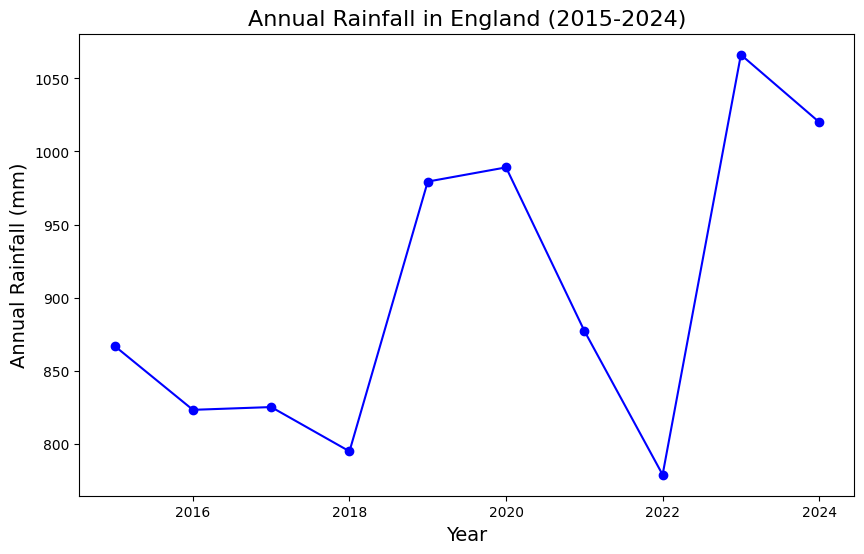

In [45]:
# Plotting the rainfall data to visualise trends

x_rainfall = rainfall_df['Year'] # Extract the 'Year' column from the Rainfall DataFrame
y_rainfall = rainfall_df['Annual Rainfall (mm)'] # Extract the 'Annual Rainfall (mm)' column from the Rainfall DataFrame

fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and axis for the plot
ax.plot(x_rainfall, y_rainfall, marker='o', linestyle='-', color='blue') # Plot the rainfall data with markers and a line
ax.set_title('Annual Rainfall in England (2015-2024)', fontsize=16) # Set the title of the plot
ax.set_xlabel('Year', fontsize=14) # Set the x-axis label
ax.set_ylabel('Annual Rainfall (mm)', fontsize=14) # Set the y-axis label

plt.show() # Display the plot

In [46]:
# not plotting data correctly, need to check the data types and ensure they are compatible for plotting

In [47]:
rainfall_df.info() # Display information about the Rainfall DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 179 to 188
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10 non-null     int32  
 1   Annual Rainfall (mm)  10 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 200.0 bytes


In [48]:
# updating the rainfall_df to ensure the data types are correct for plotting

rainfall_df['Annual Rainfall (mm)'] = rainfall_df['Annual Rainfall (mm)'].astype(float) # Ensure 'Annual Rainfall (mm)' is of type float
rainfall_df.info() # Display information about the Rainfall DataFrame after ensuring correct data types

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 179 to 188
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10 non-null     int32  
 1   Annual Rainfall (mm)  10 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 200.0 bytes


/var/folders/zh/7q9zzj496zl6c_xx_q5_21lm0000gn/T/ipykernel_9581/1583236715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_df['Annual Rainfall (mm)'] = rainfall_df['Annual Rainfall (mm)'].astype(float) # Ensure 'Annual Rainfall (mm)' is of type float


In [ ]:

rainfall_df['Year']

105    2015
106    2016
107    2017
108    2018
109    2019
110    2020
111    2021
112    2022
113    2023
114    2024
Name: Year, dtype: int32

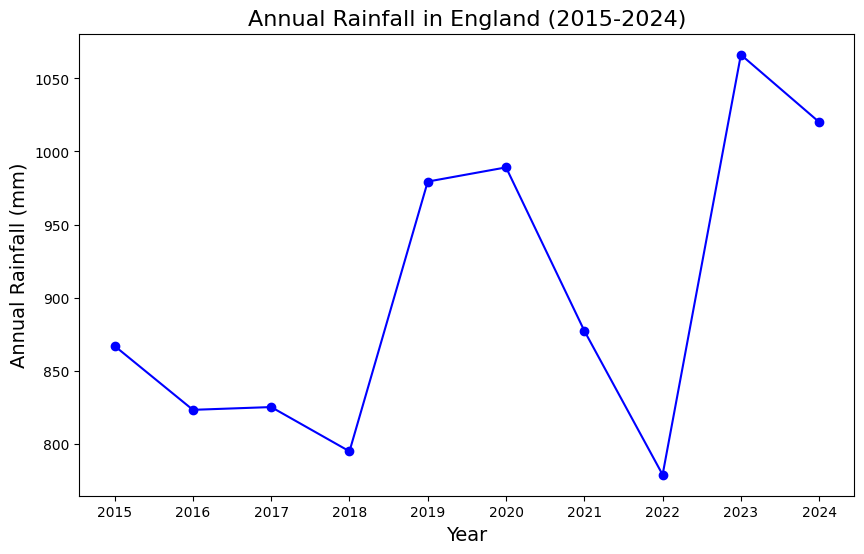

In [70]:
# Replotting rainfall data to visualise trends

x_rainfall = rainfall_df['Year'] # Extract the 'Year' column from the Rainfall DataFrame
y_rainfall = rainfall_df['Annual Rainfall (mm)'] # Extract the 'Annual Rainfall (mm)' column from the Rainfall DataFrame

fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and axis for the plot
ax.plot(x_rainfall, y_rainfall, marker='o', linestyle='-', color='blue') # Plot the rainfall data with markers and a line
ax.set_title('Annual Rainfall in England (2015-2024)', fontsize=16) # Set the title of the plot

ax.set_xticks(rainfall_df['Year'])
ax.set_xlabel('Year', fontsize=14) # Set the x-axis label
ax.set_ylabel('Annual Rainfall (mm)', fontsize=14) # Set the y-axis label

plt.show() # Display the plot

In [51]:
# Plotting of rainfall data is now correct and visualises trends effectively

## Sunshine data plotting

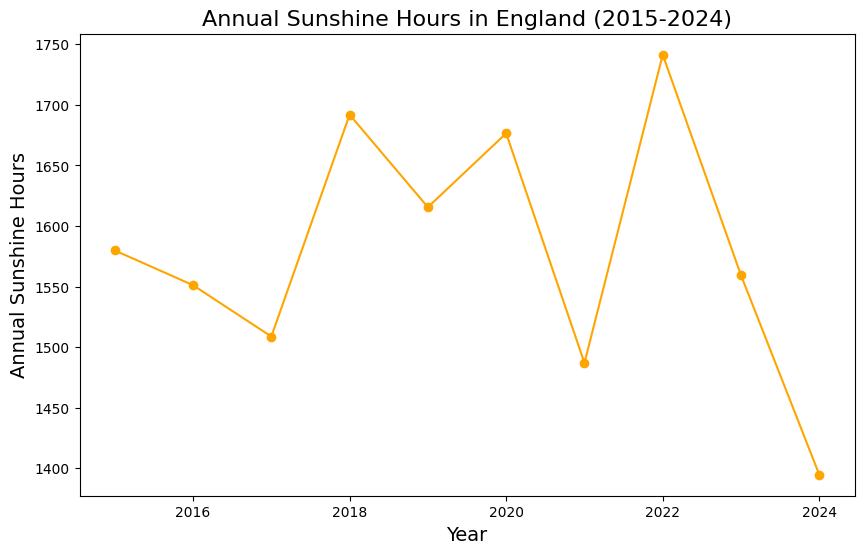

In [69]:
 # Plotting the sunshine data to visualise trends

x_sunshine = sunshine_df['Year'] # Extract the 'Year' column from the Sunshine DataFrame
y_sunshine = sunshine_df['Annual Sunshine Hours'] # Extract the 'Annual Sunshine Hours' column from the Sunshine DataFrame

fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and axis for the plot
ax.plot(x_sunshine, y_sunshine, marker='o', linestyle='-', color='orange') # Plot the sunshine data with markers and a line
ax.set_title('Annual Sunshine Hours in England (2015-2024)', fontsize=16) # Set the title of the plot
ax.set_xlabel('Year', fontsize=14) # Set the x-axis label
ax.set_ylabel('Annual Sunshine Hours', fontsize=14) # Set the y-axis label  

plt.show() # Display the plot

In [53]:
# Plotting of sunshine data is now correct and visualises trends effectively

In [54]:
list(range(sunshine_df['Year'].min(), sunshine_df['Year'].max()))

[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

## Plotting of Chlamydia data

In [55]:
chlamydia_df.head()

,Area of residence,Tests or diagnoses,Gender identity,Age,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
10,England,Diagnoses,Total,15 to 19,52952,50852,49630,50470,50924,32874,29756,38616,36783,29886
11,England,Diagnoses,Total,20 to 24,77743,78973,79274,82903,84314,60280,56202,69948,67225,55871
12,England,Diagnoses,Total,15 to 24,130695,129825,128904,133373,135238,93154,85958,108564,104008,85757


In [56]:
y_chlamydia = [chlamydia_df['Age'].iloc[2: ]]  # Extract the 'Age' column for the age group 15-24
y_chlamydia

[12    15 to 24
 Name: Age, dtype: object]

In [57]:
sub_chlamydia = chlamydia_df[['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']]

In [58]:
sub_chlamydia

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
10,52952,50852,49630,50470,50924,32874,29756,38616,36783,29886
11,77743,78973,79274,82903,84314,60280,56202,69948,67225,55871
12,130695,129825,128904,133373,135238,93154,85958,108564,104008,85757


In [59]:
y_axis = sub_chlamydia.iloc[2: ]  # Extract the 'Age' column for the age group 15-24
y_axis.columns 

Index(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024'],
      dtype='object')

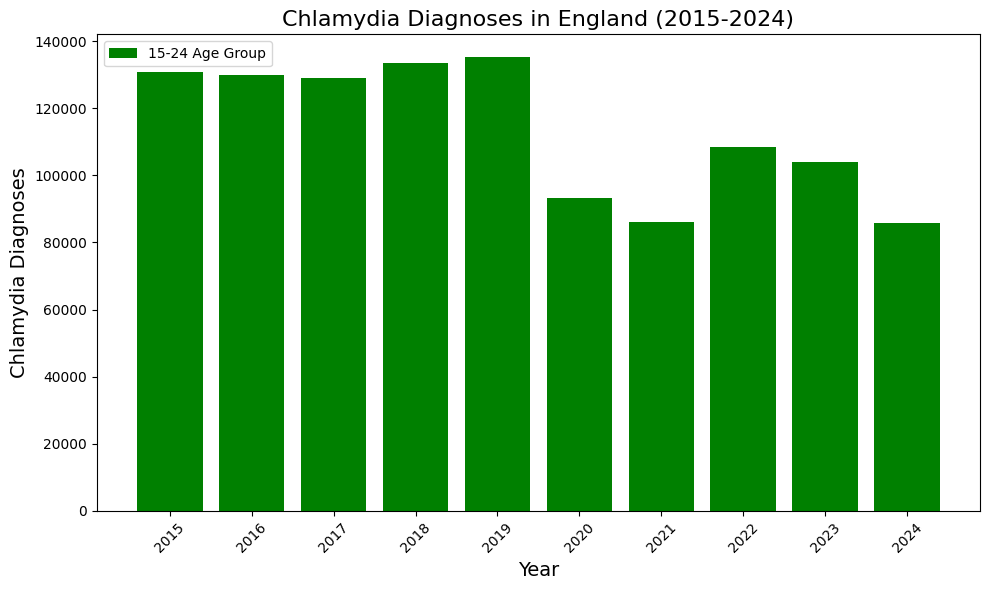

In [60]:
# Plotting the Chlamydia data to visualise trends

x_chlamydia = [str(year) for year in range(2015, 2025)]  # List of years as strings
y_chlamydia = y_axis.iloc[0].values  # Extract the values for the age group 15-24

fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and axis for the plot
# ax.plot( # use this for line plot
ax.bar(
    x_chlamydia,
    y_chlamydia,
    # linestyle='-',
    color='green',
) # Plot the Chlamydia data with markers and a line
ax.set_title('Chlamydia Diagnoses in England (2015-2024)', fontsize=16) # Set the title of the plot
ax.set_xlabel('Year', fontsize=14) # Set the x-axis label
ax.set_ylabel('Chlamydia Diagnoses', fontsize=14) # Set the y-axis label  
ax.legend(['15-24 Age Group'], loc='upper left') # Add a legend to the plot for clarity 

plt.xticks(rotation=45) # Rotate x-axis labels for better readability
# ax.set_xticks(list(range(sunshine_df['Year'].min(), sunshine_df['Year'].max())))
plt.tight_layout() # Adjust layout to prevent overlap of labels
plt.show() # Display the plot

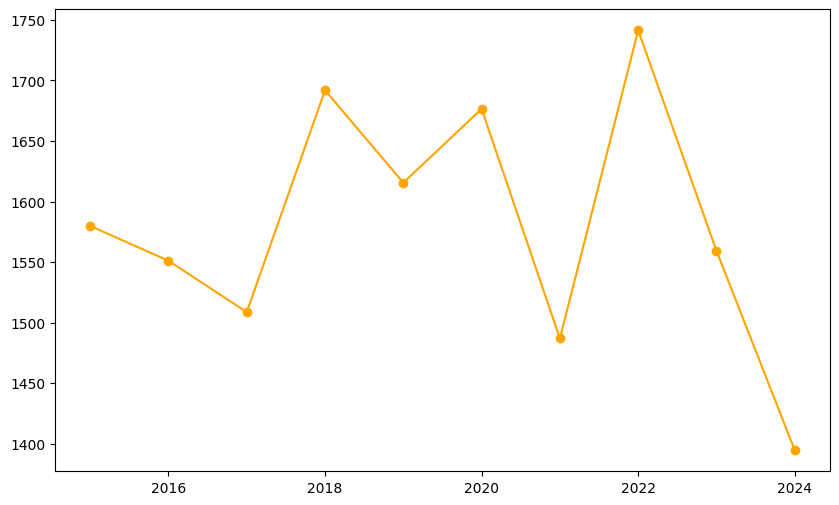

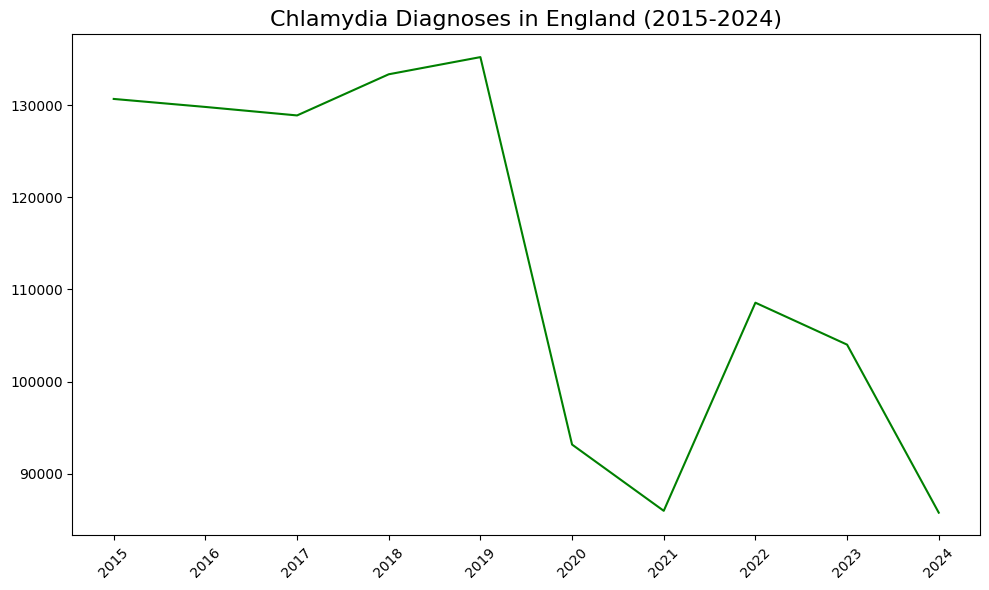

In [61]:
 # Plotting the sunshine data to visualise trends

x_sunshine = sunshine_df['Year'] # Extract the 'Year' column from the Sunshine DataFrame
y_sunshine = sunshine_df['Annual Sunshine Hours'] # Extract the 'Annual Sunshine Hours' column from the Sunshine DataFrame

fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and axis for the plot
ax.plot(x_sunshine, y_sunshine, marker='o', linestyle='-', color='orange') # Plot the sunshine data with markers and a line
# ax.set_title('Annual Sunshine Hours in England (2015-2024)', fontsize=16) # Set the title of the plot
# ax.set_xlabel('Year', fontsize=14) # Set the x-axis label
# ax.set_ylabel('Annual Sunshine Hours', fontsize=14) # Set the y-axis label  

# plt.show() # Display the plot

# Plotting the Chlamydia data to visualise trends

x_chlamydia = [str(year) for year in range(2015, 2025)]  # List of years as strings
y_chlamydia = y_axis.iloc[0].values  # Extract the values for the age group 15-24

fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and axis for the plot
ax.plot(x_chlamydia, y_chlamydia, linestyle='-', color='green') # Plot the Chlamydia data with markers and a line
ax.set_title('Chlamydia Diagnoses in England (2015-2024)', fontsize=16) # Set the title of the plot
# ax.set_xlabel('Year', fontsize=14) # Set the x-axis label
# ax.set_ylabel('Chlamydia Diagnoses', fontsize=14) # Set the y-axis label  
# ax.legend(['15-24 Age Group'], loc='upper left') # Add a legend to the plot for clarity 

plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent overlap of labels
plt.show() # Display the plot


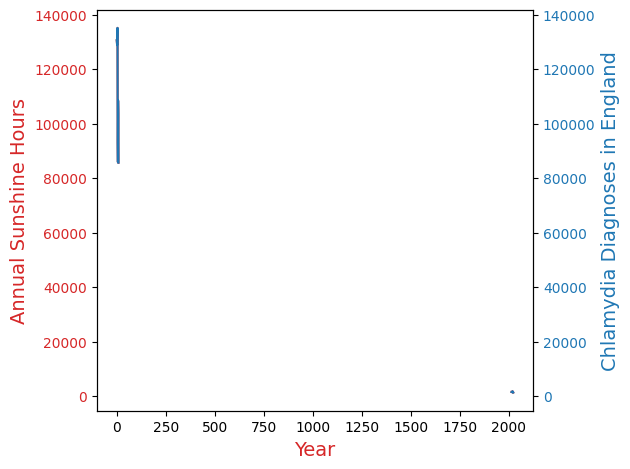

In [62]:
import matplotlib.pyplot as plt

# Create some mock data
data2 =  y_axis.iloc[0].values
data1 = sunshine_df['Annual Sunshine Hours']

fig, ax1 = plt.subplots()
sunshine_df['Year'] 

color = 'tab:red'
ax1.set_ylabel('Annual Sunshine Hours', color=color,  fontsize=14)
ax1.set_xlabel('Year', color=color, fontsize=14)
ax1.plot(sunshine_df['Year'], data1, data2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

sunshine_chlamydia_y_axis = sunshine_df['Year']

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Chlamydia Diagnoses in England', color=color, fontsize=14)  # we already handled the x-label with ax1
ax2.plot(sunshine_df['Year'] ,data1, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [63]:
# Plotting of Chlamydia data is now correct and visualises trends effectively

## Comparing Chlamydia data against sunshine and rainfall data

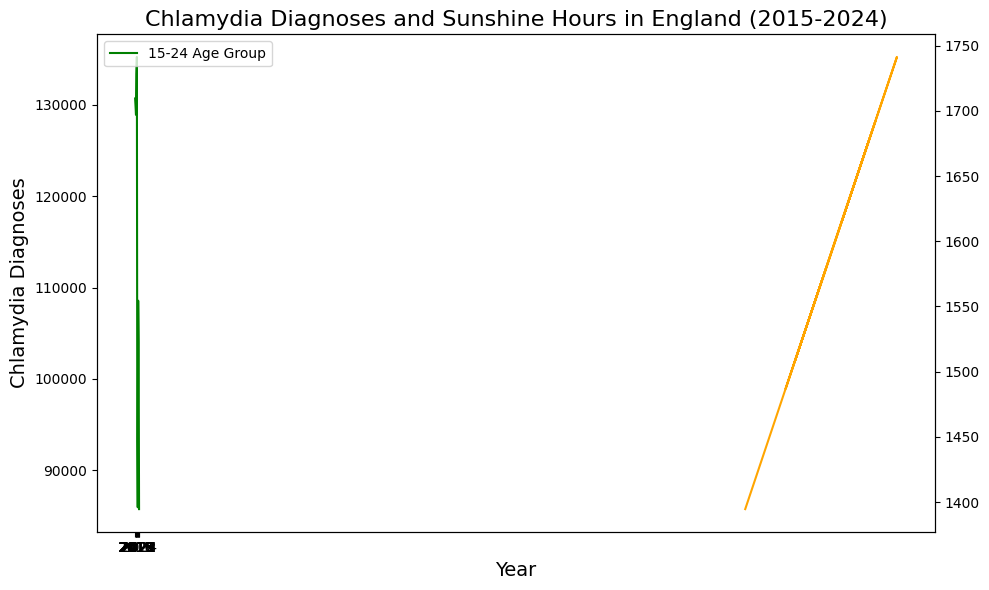

In [64]:
# Plotting Chlamydia data against sunshine data to visualise trends

fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and axis for the plot
ax.plot(x_chlamydia, y_chlamydia, linestyle='-', color='green') # Plot the Chlamydia data with markers and a line
ax2 = ax.twinx() # Create a second y-axis for the sunshine data
x_sunshine = sunshine_df['Annual Sunshine Hours'] # Extract the 'Annual Sunshine Hours' column from the Sunshine DataFrame

ax.set_title('Chlamydia Diagnoses and Sunshine Hours in England (2015-2024)', fontsize=16) # Set the title of the plot
ax.set_xlabel('Year', fontsize=14) # Set the x-axis label
ax.set_ylabel('Chlamydia Diagnoses', fontsize=14) # Set the y-axis label

ax2.plot(x_sunshine, y_sunshine, linestyle='-', color='orange') # Plot the sunshine data with markers and a line
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent overlap of labels

ax.legend(['15-24 Age Group', 'Annual Sunshine Hours'], loc='upper left') # Add a legend to the plot for clarity
plt.show() # Display the plot

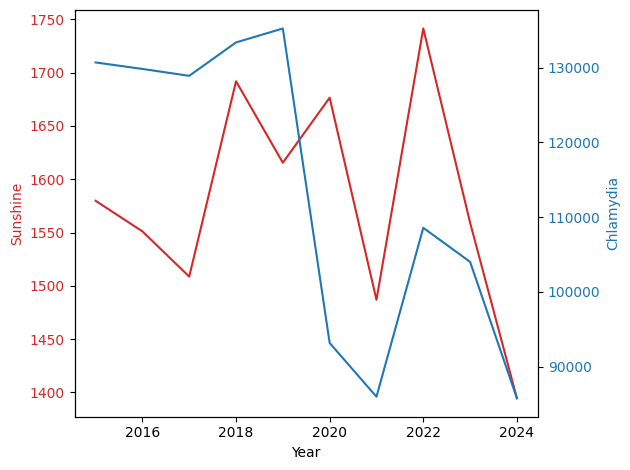

In [77]:


# Create some mock data
t = sunshine_df['Year']
data1 = sunshine_df['Annual Sunshine Hours']
data2 = y_axis.iloc[0].values  # Extract the values for the age group 15-24


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Sunshine', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Chlamydia', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

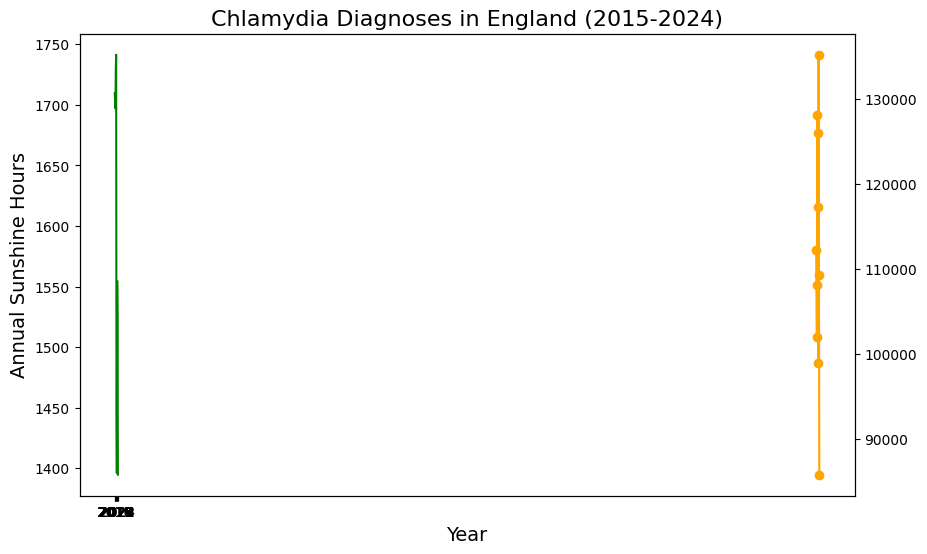

In [ ]:
 # Plotting the sunshine data to visualise trends

x_sunshine = sunshine_df['Year'] # Extract the 'Year' column from the Sunshine DataFrame
y_sunshine = sunshine_df['Annual Sunshine Hours'] # Extract the 'Annual Sunshine Hours' column from the Sunshine DataFrame

fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and axis for the plot
# ax.set_title('Annual Sunshine Hours in England (2015-2024)', fontsize=16) # Set the title of the plot
ax.set_xlabel('Year', fontsize=14) # Set the x-axis label
ax.set_ylabel('Annual Sunshine Hours', fontsize=14) # Set the y-axis label  
ax.plot(x_sunshine, y_sunshine, marker='o', linestyle='-', color='orange') # Plot the sunshine data with markers and a line

ax2 = ax.twinx()  # instantiate a second Axes that shares the same x-axis
# plt.show() # Display the plot

# Plotting the Chlamydia data to visualise trends

x_chlamydia = [str(year) for year in range(2015, 2025)]  # List of years as strings
y_chlamydia = y_axis.iloc[0].values  # Extract the values for the age group 15-24

# fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and axis for the plot
ax2.plot(x_chlamydia, y_chlamydia, linestyle='-', color='green') # Plot the Chlamydia data with markers and a line
ax2.set_title('Chlamydia Diagnoses in England (2015-2024)', fontsize=16) # Set the title of the plot
# ax.set_xlabel('Year', fontsize=14) # Set the x-axis label
# ax.set_ylabel('Chlamydia Diagnoses', fontsize=14) # Set the y-axis label  
# ax.legend(['15-24 Age Group'], loc='upper left') # Add a legend to the plot for clarity 

# plt.xticks(rotation=45) # Rotate x-axis labels for better readability
# plt.tight_layout() # Adjust layout to prevent overlap of labels
plt.show() # Display the plot


In [65]:
# Plan

# Plotting the sunshine data against Chlamydia data to visualise trends
# Plotting the rainfall data against Chlamydia data to visualise trends

# Write to a CVS file

## Final thoughts

There appears to be no trend with annual rainfall and sunshine in England and the Chlamydia diagnoses of people aged 15 to 24 years in England between 2015 to 2024. 

This could be due to the number of factors that influence STI rates such as (add info and references)

Also a trend cannot be seen in annual data however this limitation may be overcome if monthly data  for Chlamydia diagnoses by gender identity and age group in people aged 15 to 24 years in England between 2015 to 2024 was available. This could them be compared with monthly rainfall and sunshine in England. A trend may be seen as weather may have an impact on socialising... (the idea that people go out more in good weather vs staying inside more in poor weather?). 

This could be benifical information for the UK Health Security Agency (UKHSA) in prediciting increases in Chlamydia diagnositic rates using weather forecasts. As a result UKHSA could implement targeted advertisments to groups most affected by high rates of diagnosed Chlamydia. Also this information could be useful for companies that sell contraceptives that would be able to improve marketing tactics by using weather forecasts to predict when to boost marketing campaigns.

Proposed hypothesis for future work: When the monthly rainfall volume decreases and the monthly hours of sunshine increase so will the monthly diagnositic rate of Chlamydia increase due to more socialisation between sexual partners.

